In [32]:
import math
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
from numpy.random.mtrand import RandomState
from recogym import Configuration
from recogym.agents import Agent
from sklearn.linear_model import LogisticRegression

from recogym.agents import OrganicUserEventCounterAgent, organic_user_count_args
from recogym.agents import BanditCount, bandit_count_args, OrganicCount, organic_count_args
from recogym.agents import OrganicMFSquare, organic_mf_square_args, BanditMFSquare, bandit_mf_square_args
from recogym.agents import RandomAgent, random_args
from recogym.agents import FeatureProvider
from recogym import Configuration, DefaultContext, Observation
from recogym.envs.session import OrganicSessions
from recogym.evaluate_agent_sale import verify_agents_sale, plot_verify_agents_sale
from recogym.envs.utils_sale import *

import gym, recogym
from copy import deepcopy
from recogym import env_1_sale_args
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [6, 3]

num_users = 1000
# num_users = 100

env_1_sale_args['sigma_mu_organic'] = 0
env_1_sale_args['sigma_omega'] = 1
env_1_sale_args['random_seed'] = 42
env_1_sale_args['K'] = 5
env_1_sale_args['number_of_flips'] = 5
env = gym.make('reco-gym-sale-v1')
env.init_gym(env_1_sale_args)

num_products = env_1_sale_args['num_products']

In [33]:
data = deepcopy(env).generate_logs(num_users)

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 26.17it/s]


In [3]:
from recogym.envs.utils_sale import CountFeatureProvider, build_train_data, LikelihoodAgent
config = Configuration(env_1_sale_args)
count_feature_provider = CountFeatureProvider(config=config)

user_states, actions, rewards, proba_actions = build_train_data(data, count_feature_provider)
user_states, actions, rewards, proba_actions

(array([[1., 0., 0., ..., 2., 1., 0.],
        [1., 0., 0., ..., 2., 1., 0.],
        [1., 0., 0., ..., 2., 1., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 8., ..., 0., 1., 2.],
        [0., 0., 8., ..., 0., 1., 2.]]),
 array([9, 3, 7, ..., 7, 6, 4]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]))

## Baselines

In [37]:
from recogym.envs.utils_sale import SingleActionAgent

# Initialise baselines
random_agent = RandomAgent(Configuration(random_args))
sales = [data["r"][data['a']==a].sum() for a in range(num_products)]
_, views = np.unique(data[data['z'] == 'organic']['v'], return_counts=True)
greedy_bandit = SingleActionAgent(np.argmax(sales), Configuration(env_1_sale_args))
greedy_organic = SingleActionAgent(np.argmax(views), Configuration(env_1_sale_args))
count_organic = OrganicCount()
count_bandit = BanditCount()

In [5]:
result_baselines = verify_agents_sale(
    env,
    number_of_users=2000,
    agents={
        'random agent': random_agent,
        'greedy_organic':greedy_organic,
        'greedy_bandit':greedy_bandit,
        'count_organic':count_organic,
        'count_bandit':count_bandit
    }
)

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [00:59<00:00, 33.35it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [00:59<00:00, 33.35it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [01:02<00:00, 31.91it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to mat

In [6]:
# Single Product agent:

SingleProductAgents={}
for i in range(env.config.num_products):
    SingleProductAgents["Single Product "+str(i)] = SingleActionAgent(preferred_action=i)
    
result_single_product = verify_agents_sale(deepcopy(env), 2000, SingleProductAgents)

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [00:59<00:00, 33.57it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [01:06<00:00, 29.87it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [01:09<00:00, 28.75it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to mat

## Likelihood, user organic count, bandit & organic MF

In [7]:
%%time

count_product_views_feature_provider = CountFeatureProvider(config)

# likelihood agent
likelihood_logreg = LikelihoodAgent(count_product_views_feature_provider)
likelihood_logreg.train(data)

Estimated sales rate :  [0.00766871 0.01156069 0.01687764 0.01061008 0.01269394 0.01671309
 0.00853485 0.02164502 0.01759531 0.01699717]
Wall time: 2.91 s


In [8]:
# organic user-specific counter agent
organic_user_counter_agent = OrganicUserEventCounterAgent(
    Configuration({
        **organic_user_count_args,
        **env_1_sale_args,
        'select_randomly': True,
    })
)

# Organic and bandit MF
organic_mf = OrganicMFSquare()
bandit_mf = BanditMFSquare()

In [9]:
result = verify_agents_sale(
    env,
    number_of_users=2000,
    agents={
        'Organic User Count': organic_user_counter_agent,
        'Likelihood LogReg': likelihood_logreg,
        'Organic MF' : organic_mf,
        'Bandit MF' : bandit_mf
    }
)

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [01:28<00:00, 22.57it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [01:38<00:00, 20.33it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [01:04<00:00, 31.15it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to mat

## Contextual bandit : vanilla, log & POEM

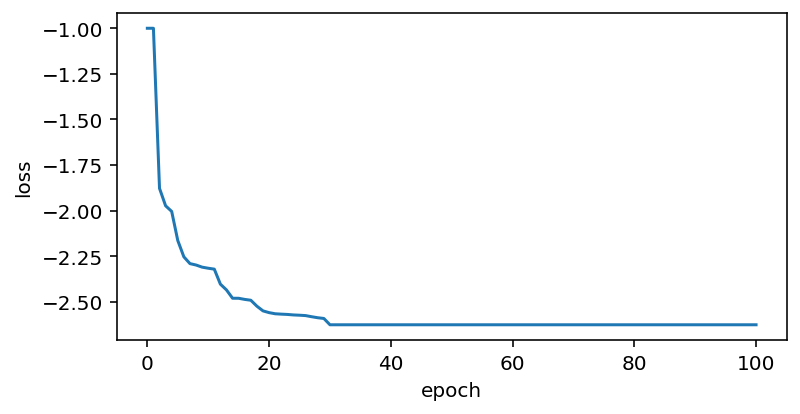

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [01:53<00:00, 17.65it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


In [10]:
from recogym.envs.utils_sale import ProductCountFeatureProvider, VanillaContextualBandit, MultinomialLogisticRegressionModel,build_rectangular_data
from recogym.envs.utils_sale import LogContextualBandit, PoemContextualBandit

rectangular_logs = build_rectangular_data(data, count_product_views_feature_provider)

vanilla_cb = VanillaContextualBandit({}, max_epoch=100)
vanilla_cb.train(rectangular_logs)
vanilla_cb.plot_loss_history()
result_AB_vanillaCB = verify_agents_sale(env, 2000, {'Contextual Bandit': vanilla_cb})


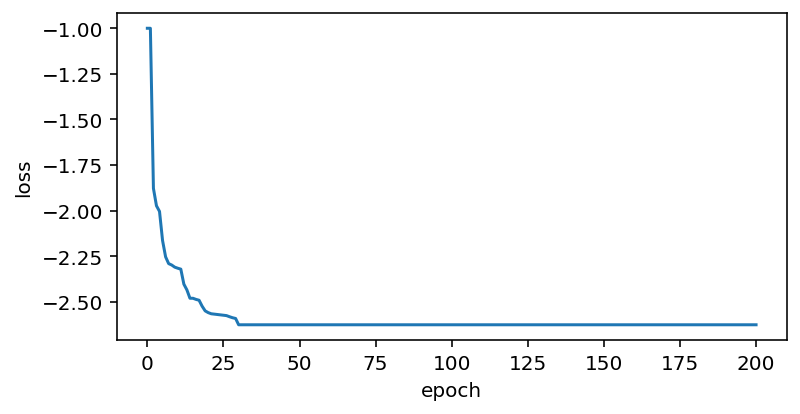

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [01:16<00:00, 26.04it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


In [11]:
log_cb = LogContextualBandit({}, max_epoch=200)
log_cb.train(rectangular_logs)
log_cb.plot_loss_history()
result_AB_LogCB = verify_agents_sale(env, 2000, {'Log Contextual Bandit': log_cb})

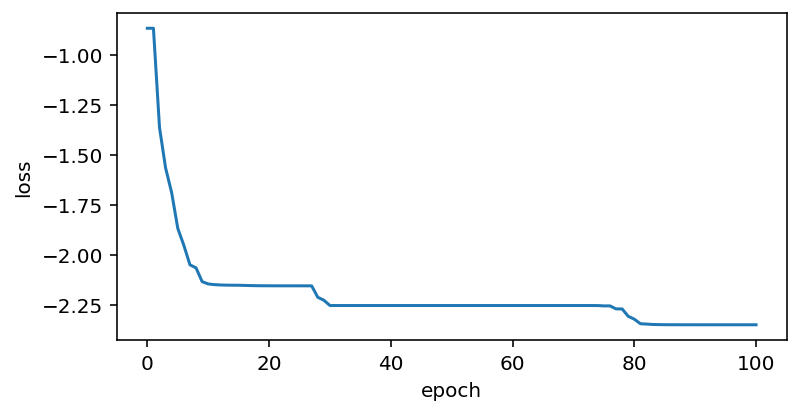

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [01:18<00:00, 25.57it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


In [12]:
poem = PoemContextualBandit({}, variance_penalization_factor=0.4, max_epoch=100)
poem.train(rectangular_logs)
poem.plot_loss_history()
result_AB_POEM = verify_agents_sale(env, 2000, {f'POEM': poem})

# Oracles
2 types of oracles : the ones looking at absolute sales, and the ones looking at incremental sales. Oracles have access to user embeddings, and some/all product features

## Oracles (looking at incremental sales)

#### Oracle that has access to the click, view, and sale proba of each product

In [13]:
from recogym.agents.sale_oracle import ClickViewSaleOracleAgent

cvs_oracle = ClickViewSaleOracleAgent(env=env)
cvs_oracle.reset()
result_cvs_oracle = verify_agents_sale(env, 2000, {'Click View Sale oracle': cvs_oracle}, agent_reset = True)

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [05:05<00:00,  6.54it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


#### Oracle that has access to the click and sale proba of each product

In [14]:
from recogym.agents.sale_oracle import ClickSaleOracleAgent

cs_oracle = ClickSaleOracleAgent(env=env)
cs_oracle.reset()
result_cs_oracle = verify_agents_sale(env, 2000, {'Click Sale oracle': cs_oracle}, agent_reset = True)

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [04:48<00:00,  6.94it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


#### Oracle that has access to the view and sale proba of each product

In [15]:
from recogym.agents.sale_oracle import ViewSaleOracleAgent
vs_oracle = ViewSaleOracleAgent(env=env)
vs_oracle.reset()
result_vs_oracle = verify_agents_sale(env, 2000, {'View Sale oracle': vs_oracle}, agent_reset = True)

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [02:01<00:00, 16.52it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


#### Oracle that has access to the sale proba of each product only

In [16]:
from recogym.agents.sale_oracle import SaleOracleAgent
sale_oracle = SaleOracleAgent(env = env)
sale_oracle.reset()
result_AB_sale_oracle = verify_agents_sale(deepcopy(env), 2000, {'Sale oracle': sale_oracle})

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [01:11<00:00, 28.05it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


## Count oracles (just count the number of sales, not the incremental sales)

#### Oracle that has access to the click, view, and sale proba of each product

In [17]:
from recogym.agents.sale_count_oracle import ClickViewSaleCountOracleAgent

cvs_count_oracle = ClickViewSaleCountOracleAgent(env=env)
cvs_count_oracle.reset()
result_cvs_count_oracle = verify_agents_sale(env, 2000, {'Click View Sale Count oracle': cvs_count_oracle}, agent_reset = True)

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [05:01<00:00,  6.62it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


#### Oracle that has access to the click and sale proba of each product

In [18]:
from recogym.agents.sale_count_oracle import ClickSaleCountOracleAgent

cs_count_oracle = ClickSaleCountOracleAgent(env=env)
cs_count_oracle.reset()
result_cs_count_oracle = verify_agents_sale(env, 2000, {'Click Sale Count oracle': cs_count_oracle}, agent_reset = True)

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [04:34<00:00,  7.28it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


#### Oracle that has access to the view, and sale proba of each product

In [19]:
from recogym.agents.sale_count_oracle import ViewSaleCountOracleAgent
vs_count_oracle = ViewSaleCountOracleAgent(env=env)
vs_count_oracle.reset()
result_vs_count_oracle = verify_agents_sale(env, 2000, {'View Sale Count oracle': vs_count_oracle}, agent_reset = True)

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [01:47<00:00, 18.61it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


#### Oracle that has access to the sale proba of each product only

In [20]:
from recogym.agents.sale_count_oracle import SaleCountOracleAgent
sale_count_oracle = SaleCountOracleAgent(env = env)
sale_count_oracle.reset()
result_AB_sale_count_oracle = verify_agents_sale(deepcopy(env), 2000, {'Sale Count oracle': sale_count_oracle})

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [01:19<00:00, 25.29it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:702: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


## Expectation oracles (based on the expected number of sales)

#### Oracle that looks at the difference of sales if the user embedding doesn't get updated

In [2]:
from recogym.agents.sale_oracle import ClickViewExpectSalesOracleAgent
env.reset()
cves_oracle = ClickViewExpectSalesOracleAgent(env = env)
cves_oracle.reset()
result_AB_cves_oracle = verify_agents_sale(deepcopy(env), 2000, {'ClickViewExpectSalesOracleAgent': cves_oracle})

Organic Users: 0it [00:00, ?it/s]
Users: 100%|███████████████████████████████████████████████████████████████████████| 2000/2000 [21:44<00:00,  1.53it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:703: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


In [3]:
result_AB_cves_oracle['Share user with sale']

,Agent,0.025,0.500,0.975
0,ClickViewExpectSalesOracleAgent,0.475112,0.497002,0.5189


In [4]:
from recogym.agents.sale_oracle import ClickViewExpectGhostSalesOracleAgent
env.reset()
cvegs_oracle = ClickViewExpectGhostSalesOracleAgent(env = env)
cvegs_oracle.reset()
result_AB_cvegs_oracle = verify_agents_sale(deepcopy(env), 200, {'ClickViewExpectGhostSalesOracleAgent': cvegs_oracle})

Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████████| 200/200 [02:31<00:00,  1.32it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:703: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


In [5]:
result_AB_cvegs_oracle["Share user with sale"]

,Agent,0.025,0.500,0.975
0,ClickViewExpectGhostSalesOracleAgent,0.436199,0.504967,0.573609


In [8]:
from recogym.agents.sale_count_oracle import ClickViewExpectSalesCountOracleAgent
env.reset()
cvesc_oracle = ClickViewExpectSalesCountOracleAgent(env = env)
cvesc_oracle.reset()
result_AB_cvesc_oracle = verify_agents_sale(deepcopy(env), 200, {'ClickViewExpectSalesCountOracleAgent': cvesc_oracle})

Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████████| 200/200 [01:31<00:00,  2.18it/s]
C:\Users\Philo\Documents\reco-gym\recogym\evaluate_agent_sale.py:703: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_list[agent_id] = data[data["a"] >= 0][data["c"] > 0]


In [9]:
result_AB_cvesc_oracle["Share user with sale"]

,Agent,0.025,0.500,0.975
0,ClickViewExpectSalesCountOracleAgent,0.416609,0.485099,0.553966


## Concatenate results

In [21]:
result_list = [result_baselines, 
#                result_single_product,
#                result, 
#                result_AB_vanillaCB, result_AB_LogCB, result_AB_POEM, 
               result_AB_sale_oracle, result_cs_oracle, result_vs_oracle, result_cvs_oracle,
               result_AB_sale_count_oracle, result_cs_count_oracle, result_vs_count_oracle, result_cvs_count_oracle
              ]
result_list = [list(res.values()) for res in result_list]
# for each type of metrics, concatenate the results for all agents
result_concat = (pd.concat([res[0] for res in result_list]),
                 pd.concat([res[1] for res in result_list]),
                 pd.concat([res[2] for res in result_list]),
                 pd.concat([res[3] for res in result_list]),
                 pd.concat([res[4] for res in result_list]))

In [22]:
# result_concat[0]
for i, res in enumerate(result_concat):
    print(list(result.keys())[i])
    display(res)

sale rate


,Agent,0.025,0.500,0.975
0,random agent,0.013330,0.013887,0.014459
1,greedy_organic,0.012527,0.013080,0.013648
2,greedy_bandit,0.013444,0.014015,0.014601
3,count_organic,0.013526,0.014088,0.014666
4,count_bandit,0.012766,0.013319,0.013888
0,Sale oracle,0.013923,0.014503,0.015098
0,Click Sale oracle,0.013707,0.014280,0.014868
0,View Sale oracle,0.014208,0.014789,0.015386
0,Click View Sale oracle,0.014550,0.015154,0.015773
0,Sale Count oracle,0.014300,0.014888,0.015493


CTR


,Agent,0.025,0.500,0.975
0,random agent,0.009758,0.010236,0.010729
1,greedy_organic,0.008785,0.009249,0.009729
2,greedy_bandit,0.009451,0.009931,0.010427
3,count_organic,0.008514,0.008962,0.009425
4,count_bandit,0.008664,0.009122,0.009595
0,Sale oracle,0.009387,0.009865,0.010358
0,Click Sale oracle,0.010277,0.010775,0.011288
0,View Sale oracle,0.010162,0.010655,0.011164
0,Click View Sale oracle,0.010524,0.011039,0.011570
0,Sale Count oracle,0.009342,0.009820,0.010313


Tot sales


,Agent,TotSales
0,random agent,1.0675
1,greedy_organic,1.0675
2,greedy_bandit,1.0675
3,count_organic,1.0675
4,count_bandit,1.0675
0,Sale oracle,1.1535
0,Click Sale oracle,1.1445
0,View Sale oracle,1.1945
0,Click View Sale oracle,1.1615
0,Sale Count oracle,1.1790


Share user with sale


,Agent,0.025,0.500,0.975
0,random agent,0.477108,0.499001,0.520896
1,greedy_organic,0.477108,0.499001,0.520896
2,greedy_bandit,0.490089,0.511992,0.533865
3,count_organic,0.488091,0.509993,0.531871
4,count_bandit,0.489090,0.510993,0.532868
0,Sale oracle,0.483097,0.504997,0.526884
0,Click Sale oracle,0.506086,0.527981,0.549806
0,View Sale oracle,0.500084,0.521985,0.543830
0,Click View Sale oracle,0.492087,0.513991,0.535859
0,Sale Count oracle,0.504585,0.526482,0.548312


Share sale after click


,Agent,0.025,0.500,0.975
0,random agent,0.230071,0.250346,0.271377
1,greedy_organic,0.227146,0.248860,0.271452
2,greedy_bandit,0.246037,0.267498,0.289714
3,count_organic,0.220519,0.241917,0.264211
4,count_bandit,0.232128,0.253986,0.276705
0,Sale oracle,0.274296,0.296540,0.319447
0,Click Sale oracle,0.221870,0.241659,0.262212
0,View Sale oracle,0.267301,0.288369,0.310065
0,Click View Sale oracle,0.251783,0.272638,0.294180
0,Sale Count oracle,0.281824,0.304348,0.327515


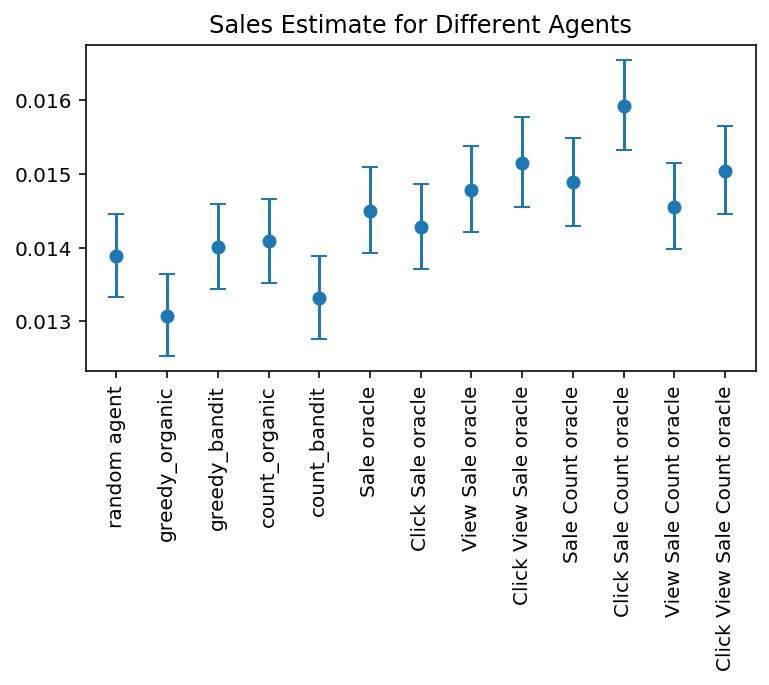

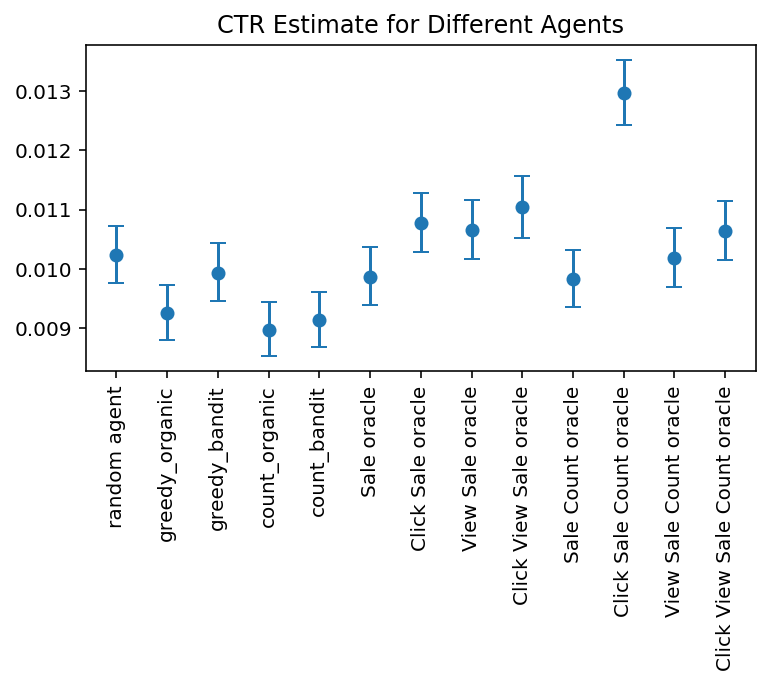

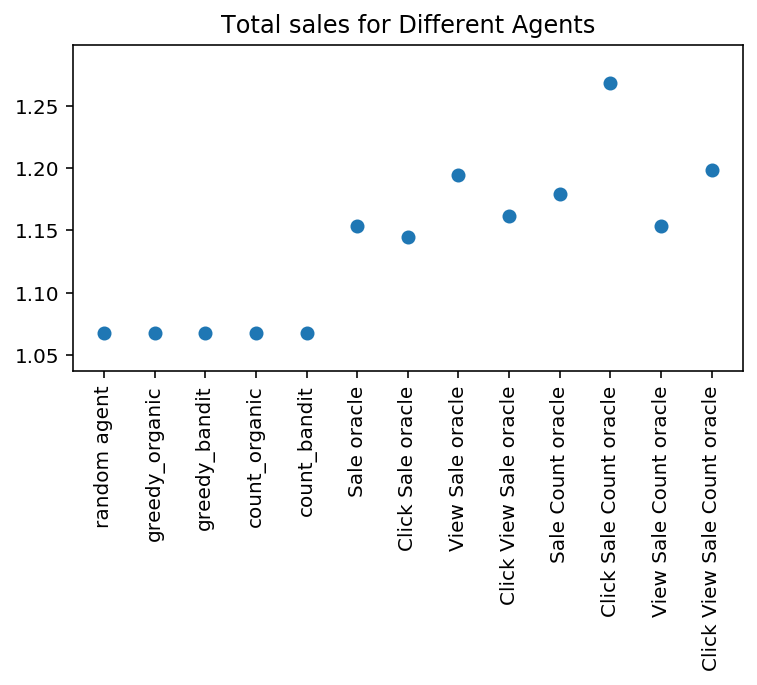

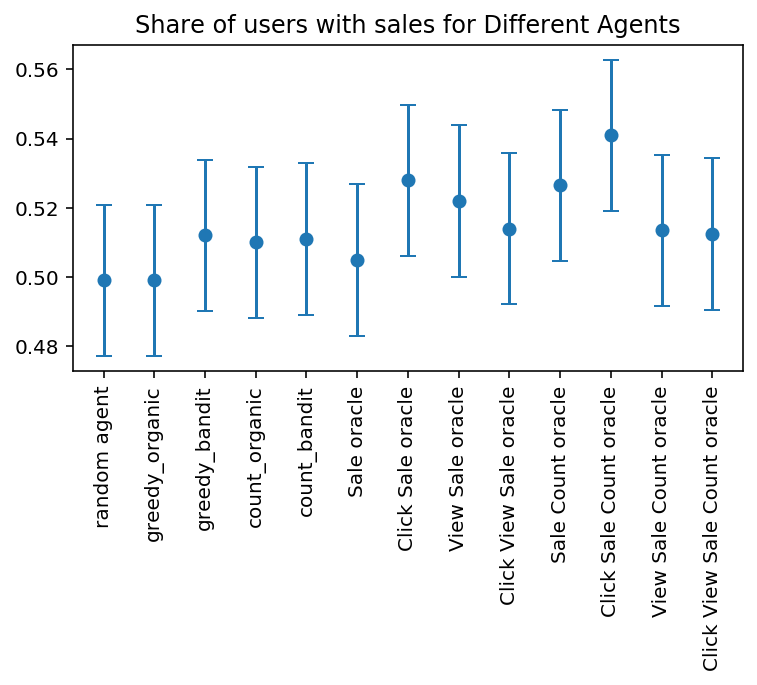

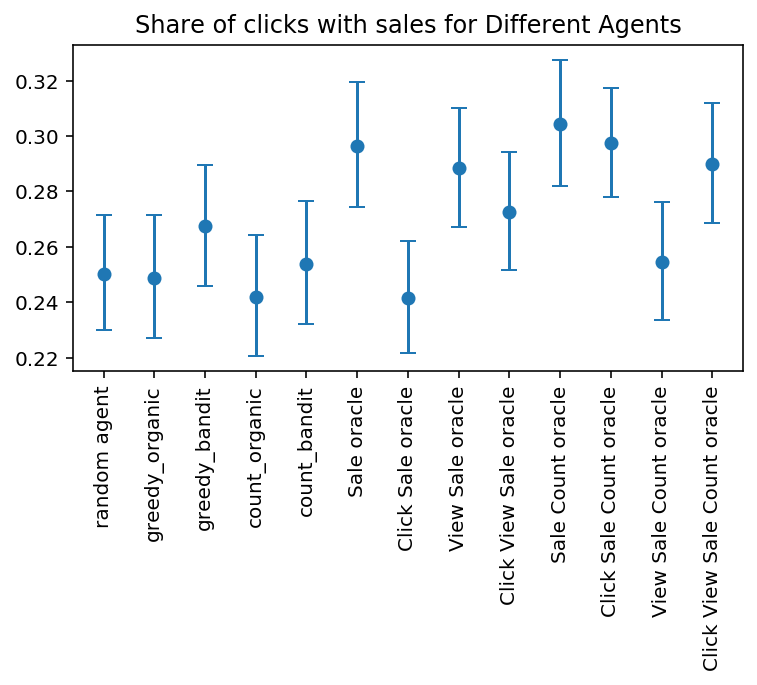

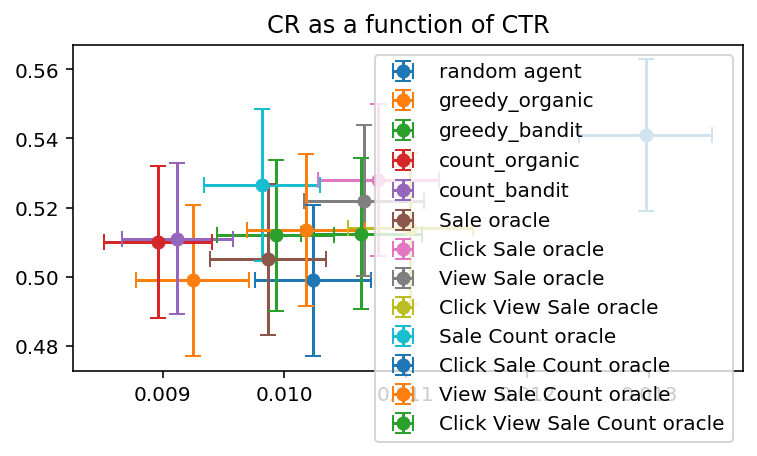

In [23]:
fig = plot_verify_agents_sale(*result_concat,[res[5] for res in result_list])
plt.show()

In [42]:
def plot_CR_CTR(agent,result):
    beta = result['config_list'][agent]['beta']
    psale_scale = result['config_list'][agent]['psale_scale']
    Lambda = result['config_list'][agent]['Lambda']
    from recogym.envs.reco_env_v1_sale import ff, sig
    embeddings = [result["User embeddings"][agent][i]["init"] for i in result["reco"][agent]["u"]]
    actions = list(result["reco"][agent]["a"])

    # plt.scatter([ff(embeddings[i][:,0]@beta[actions[i],:]) for i in range(len(embeddings))],
    #             [psale_scale*sig(embeddings[i][:,0]@Lambda[actions[i],:]) for i in range(len(embeddings))], 
    #             alpha=0.3, label='init')


    embeddings = [result["User embeddings"][agent][i]["end"] for i in result["reco"][agent]["u"]]
    actions = list(result["reco"][agent]["a"])

    # Embeddings
#     plt.scatter([embeddings[i][:,0]@beta[actions[i],:] for i in range(len(embeddings))],
#                 [embeddings[i][:,0]@Lambda[actions[i],:] for i in range(len(embeddings))], 
#                 alpha=0.3, label='init')
    plt.scatter([embeddings[i][:,0]@beta[actions[i],:] for i in range(len(embeddings))],
                [embeddings[i][:,0]@Lambda[actions[i],:] for i in range(len(embeddings))], 
                alpha=0.3, label='end')
    plt.xlabel("CTR embedding")
    plt.ylabel("CR embedding")
    plt.title("Features of CR as a function of features of CTR with "+agent+" agent")
    plt.legend()
    plt.show()

#     # Rates (after embeddings transformation)
#     plt.scatter([ff(embeddings[i][:,0]@beta[actions[i],:]) for i in range(len(embeddings))],
#                 [psale_scale*sig(embeddings[i][:,0]@Lambda[actions[i],:]) for i in range(len(embeddings))], 
#                 alpha=0.3, label='init')
#     plt.scatter([ff(embeddings[i][:,0]@beta[actions[i],:]) for i in range(len(embeddings))],
#                 [psale_scale*sig(embeddings[i][:,0]@Lambda[actions[i],:]) for i in range(len(embeddings))], 
#                 alpha=0.3, label='end')
#     plt.xlabel("CTR")
#     plt.ylabel("CR")
#     plt.title("CR as a function of CTR with "+agent+" agent")
#     plt.legend()
#     plt.show()




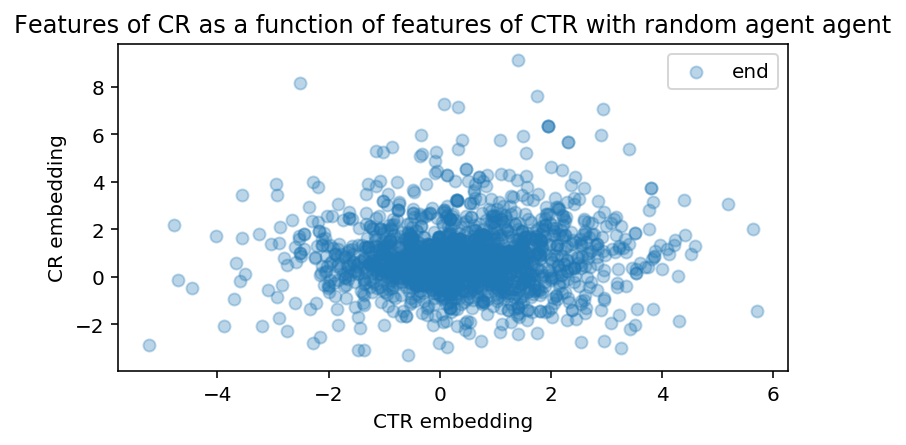

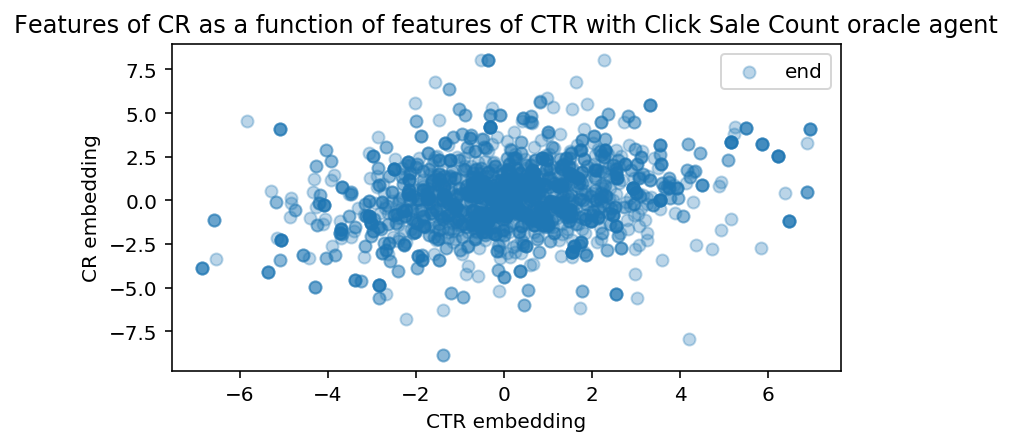

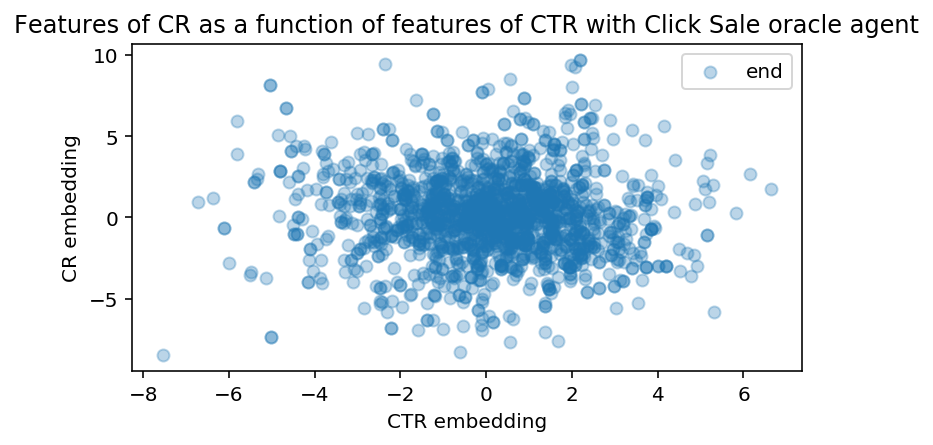

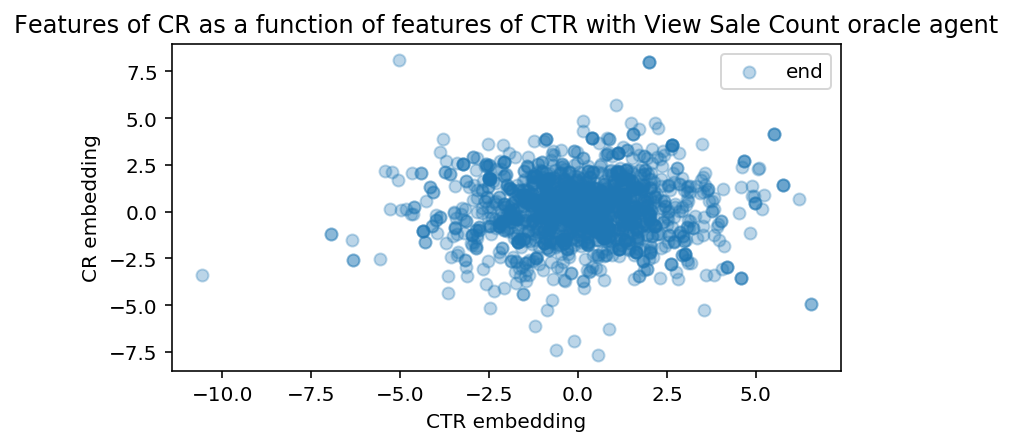

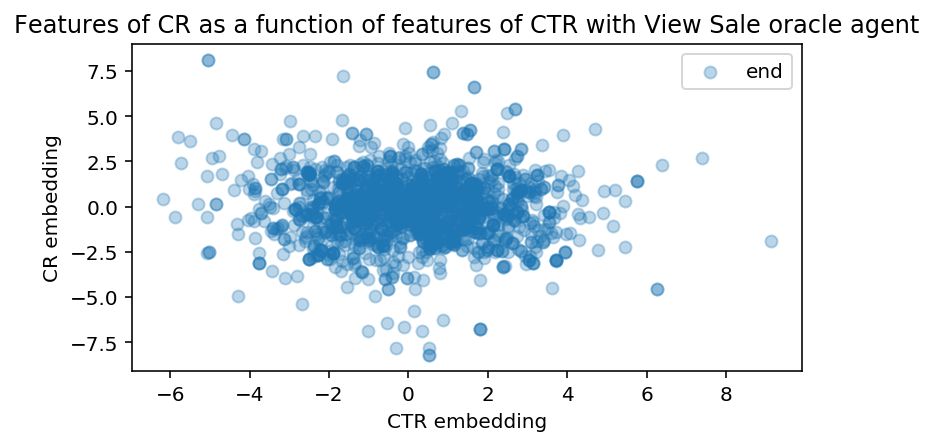

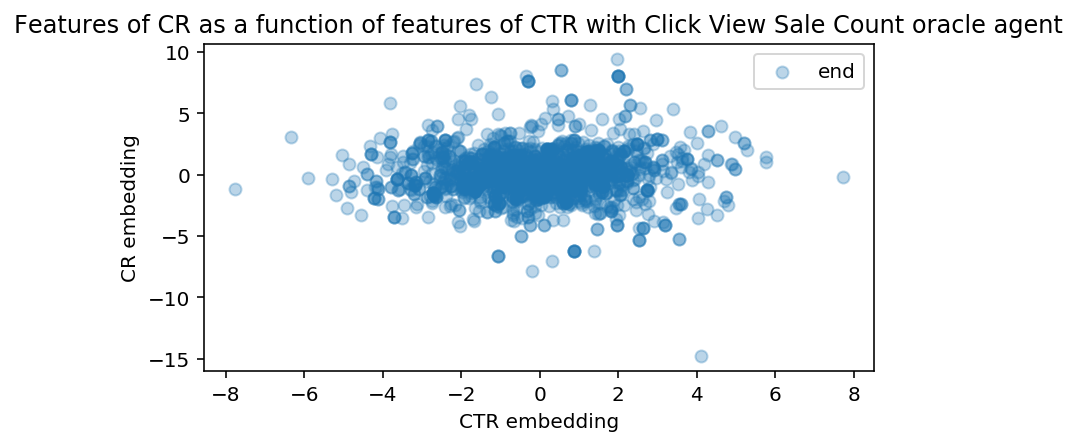

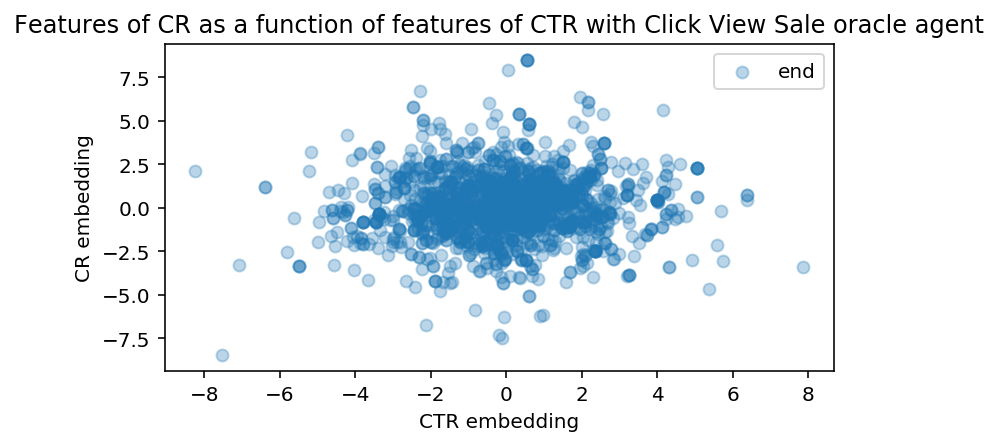

In [43]:
# from recogym.evaluate_agent_sale import plot_CR_CTR
plot_CR_CTR(agent="random agent",result=result_baselines)
plot_CR_CTR(agent="Click Sale Count oracle",result=result_cs_count_oracle)
plot_CR_CTR(agent="Click Sale oracle",result=result_cs_oracle)
plot_CR_CTR(agent="View Sale Count oracle",result=result_vs_count_oracle)
plot_CR_CTR(agent="View Sale oracle",result=result_vs_oracle)
plot_CR_CTR(agent="Click View Sale Count oracle",result=result_cvs_count_oracle)
plot_CR_CTR(agent="Click View Sale oracle",result=result_cvs_oracle)

## Sensitivity analysis to $\kappa$

In [7]:
from recogym.envs.utils_sale import SingleActionAgent
from recogym.agents import RandomAgent, random_args
from recogym.agents import OrganicUserEventCounterAgent, organic_user_count_args
# from recogym.agents import BanditCount, bandit_count_args, OrganicCount, organic_count_args
# from recogym.agents import OrganicMFSquare, organic_mf_square_args, BanditMFSquare, bandit_mf_square_args


In [8]:
kappa_values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
result_kappa_all = []

for kap in kappa_values :
    print("_________________________________________________________________________________________________________")
    print("_________________________________________________________________________________________________________")
    print("___________________________________________ kappa = "+str(kap)+"____________________________________________")
    print("_________________________________________________________________________________________________________")
    print("_________________________________________________________________________________________________________")
    
    env_1_sale_args["kappa"] = kap
    env = gym.make('reco-gym-sale-v1')
    env.init_gym(env_1_sale_args)

    prod0 = SingleActionAgent(0, Configuration(env_1_sale_args))
    prod1 = SingleActionAgent(1, Configuration(env_1_sale_args))
    prod2 = SingleActionAgent(2, Configuration(env_1_sale_args))
    
    res = verify_agents_sale(
        env,
        number_of_users=10000,
        agents={
            'random agent': RandomAgent(Configuration(random_args)),
            'Prod0': prod0,
            'Prod1': prod1,
            'Prod2': prod2,
            'organic_user_counter_agent' : OrganicUserEventCounterAgent(
        Configuration({
            **organic_user_count_args,
            **env_1_sale_args,
            'select_randomly': True,
        })
    )

        }
    )
    result_kappa_all.append(res)
    
env_1_sale_args["kappa"] = 0.2

Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                                 | 0/10000 [00:00<?, ?it/s]

_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
___________________________________________ kappa = 0____________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:52<00:00, 24.24it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [04:42<00:00, 35.42it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [04:54<00:00, 33.98it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:02<00:00, 33.08it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [07:43<00:00, 21.59it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                         | 3/10000 [00:00<05:39, 29.43it/s]

_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
___________________________________________ kappa = 0.1____________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:31<00:00, 30.13it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:22<00:00, 30.98it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:20<00:00, 31.16it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [04:59<00:00, 33.42it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [07:24<00:00, 22.48it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                                 | 0/10000 [00:00<?, ?it/s]

_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
___________________________________________ kappa = 0.2____________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:26<00:00, 30.65it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:00<00:00, 33.31it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [04:44<00:00, 35.14it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [04:42<00:00, 35.38it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:48<00:00, 24.49it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                                 | 0/10000 [00:00<?, ?it/s]

_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
___________________________________________ kappa = 0.3____________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [04:58<00:00, 33.55it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [04:36<00:00, 36.19it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:02<00:00, 27.56it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:19<00:00, 26.38it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [09:41<00:00, 17.21it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                                 | 0/10000 [00:00<?, ?it/s]

_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
___________________________________________ kappa = 0.4____________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:40<00:00, 24.96it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [04:30<00:00, 36.98it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:26<00:00, 30.59it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:31<00:00, 25.53it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [09:51<00:00, 16.90it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                                 | 0/10000 [00:00<?, ?it/s]

_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
___________________________________________ kappa = 0.5____________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [08:02<00:00, 20.74it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:26<00:00, 25.88it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:22<00:00, 30.99it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:56<00:00, 28.03it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [07:15<00:00, 22.94it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                                 | 0/10000 [00:00<?, ?it/s]

_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
___________________________________________ kappa = 0.6____________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:06<00:00, 27.25it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [07:49<00:00, 21.32it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:06<00:00, 32.65it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:08<00:00, 32.44it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [08:06<00:00, 20.54it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                                 | 0/10000 [00:00<?, ?it/s]

_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
___________________________________________ kappa = 0.7____________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [07:13<00:00, 23.06it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:32<00:00, 25.50it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:59<00:00, 27.80it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:27<00:00, 25.83it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [07:51<00:00, 21.22it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                         | 4/10000 [00:00<05:24, 30.79it/s]

_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
___________________________________________ kappa = 0.8____________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:37<00:00, 29.59it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:29<00:00, 30.39it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [05:39<00:00, 29.46it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:00<00:00, 27.74it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [07:34<00:00, 22.02it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                                 | 0/10000 [00:00<?, ?it/s]

_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
___________________________________________ kappa = 0.9____________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:18<00:00, 26.45it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:54<00:00, 24.15it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:26<00:00, 25.86it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [06:13<00:00, 26.78it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [09:10<00:00, 18.16it/s]
Organic Users: 0it [00:00, ?it/s]
Users:   0%|                                                                                 | 0/10000 [00:00<?, ?it/s]

_________________________________________________________________________________________________________
_________________________________________________________________________________________________________
___________________________________________ kappa = 1____________________________________________
_________________________________________________________________________________________________________
_________________________________________________________________________________________________________


Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [08:44<00:00, 19.06it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [08:55<00:00, 18.66it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [07:39<00:00, 21.77it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [07:34<00:00, 22.01it/s]
Organic Users: 0it [00:00, ?it/s]
Users: 100%|█████████████████████████████████████████████████████████████████████| 10000/10000 [10:13<00:00, 16.30it/s]


In [9]:
import pickle as pkl
pkl.dump(result_kappa_all,open("data/result_kappa_all.pkl","wb"))
resu = result_kappa_all
# resu = pkl.load(open("data/result_kappa_all.pkl","rb"))
# kappa_values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

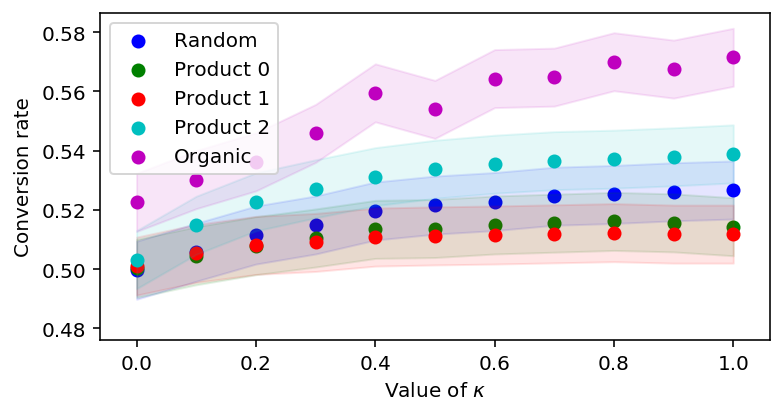

In [16]:
metric = "Share user with sale"
label_list=["Random","Product 0","Product 1","Product 2","Organic"]
for prod in range(5):
    y = [resu[i][metric]["0.500"].iloc[prod] for i in range(len(kappa_values))]
#     plt.plot(kappa_values,y)
    plt.scatter(kappa_values,
                y,
#                  yerr=([resu[i][metric]["0.500"].iloc[prod]-resu[i][metric]["0.025"].iloc[prod] for i in range(len(kappa_values))],
#                        [resu[i][metric]["0.500"].iloc[prod]-resu[i][metric]["0.025"].iloc[prod] for i in range(len(kappa_values))]),
#                  fmt='o',
#                  capsize=4,
#                 label = "Prod "+str(prod))
                 label = label_list[prod],
               color = ['b', 'g', 'r', 'c', 'm', 'y', 'k'][prod])
    ci = resu[0][metric]["0.500"].iloc[prod]-resu[0][metric]["0.025"].iloc[prod]
    plt.fill_between(x=kappa_values, 
                     y1=y-ci, 
                     y2=y+ci,
                     alpha=.1,
                    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k'][prod])
plt.legend()
plt.xlabel("Value of $\kappa$")
plt.ylabel("Conversion rate")
# plt.title("Conversion rate")
plt.show()

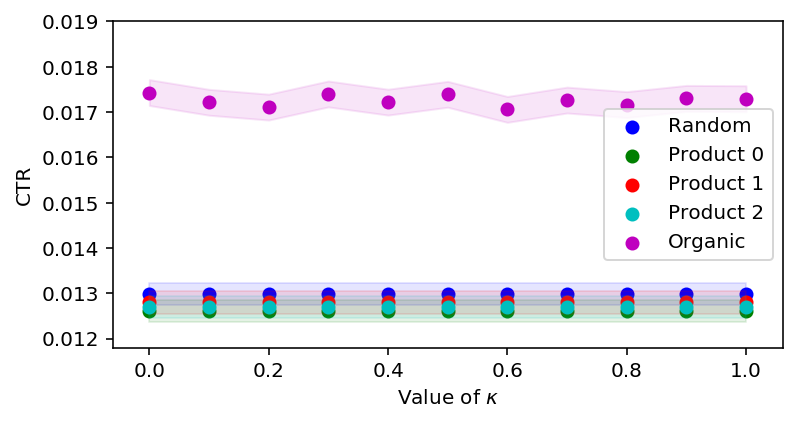

In [29]:
metric = "CTR"
label_list=["Random","Product 0","Product 1","Product 2","Organic"]
for prod in range(5):
    y = [resu[i][metric]["0.500"].iloc[prod] for i in range(len(kappa_values))]
#     plt.plot(kappa_values,y)
    plt.scatter(kappa_values,
                y,
#                  yerr=([resu[i][metric]["0.500"].iloc[prod]-resu[i][metric]["0.025"].iloc[prod] for i in range(len(kappa_values))],
#                        [resu[i][metric]["0.500"].iloc[prod]-resu[i][metric]["0.025"].iloc[prod] for i in range(len(kappa_values))]),
#                  fmt='o',
#                  capsize=4,
#                 label = "Prod "+str(prod))
                 label = label_list[prod],
               color = ['b', 'g', 'r', 'c', 'm', 'y', 'k'][prod])
    ci = resu[0][metric]["0.500"].iloc[prod]-resu[0][metric]["0.025"].iloc[prod]
    plt.fill_between(x=kappa_values, 
                     y1=y-ci, 
                     y2=y+ci,
                     alpha=.1,
                    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k'][prod])
plt.ylim(0.0118,0.019)
plt.xlabel("Value of $\kappa$")
plt.ylabel("CTR")
# plt.title("CTR")
plt.legend()
plt.show()

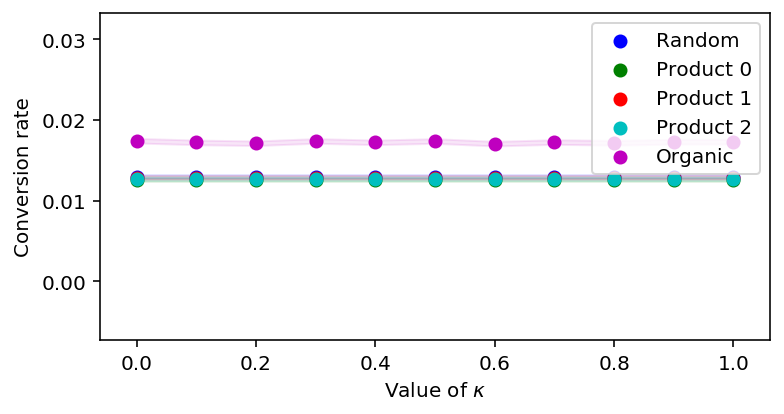

In [19]:
metric = "CTR"
label_list=["Random","Product 0","Product 1","Product 2","Organic"]
for prod in range(5):
    y = [resu[i][metric]["0.500"].iloc[prod] for i in range(len(kappa_values))]
#     plt.plot(kappa_values,y)
    plt.scatter(kappa_values,
                y,
#                  yerr=([resu[i][metric]["0.500"].iloc[prod]-resu[i][metric]["0.025"].iloc[prod] for i in range(len(kappa_values))],
#                        [resu[i][metric]["0.500"].iloc[prod]-resu[i][metric]["0.025"].iloc[prod] for i in range(len(kappa_values))]),
#                  fmt='o',
#                  capsize=4,
#                 label = "Prod "+str(prod))
                 label = label_list[prod],
               color = ['b', 'g', 'r', 'c', 'm', 'y', 'k'][prod])
    ci = resu[0][metric]["0.500"].iloc[prod]-resu[0][metric]["0.025"].iloc[prod]
    plt.fill_between(x=kappa_values, 
                     y1=y-ci, 
                     y2=y+ci,
                     alpha=.1,
                    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k'][prod])
plt.legend()
plt.xlabel("Value of $\kappa$")
plt.ylabel("Conversion rate")
# plt.title("Conversion rate")
plt.show()